# Cours 2 - Visualisation des donées (data visualisation, data viz)

**Objectifs du cours:**
- Savoir produire des graphiques simples de données catégoriques et numériques avec la librairie pandas
- Connaître et appliquer les principes basiques de design pour une meilleure lecture de graphes
- Connaître et eviter les biais prinicpaux dans la représentation de données 

**Pourquoi est ce que la visualisation de donnés est importante ?**
- Pour avoir des informations faciles à saisir 
- Pour explorer nos données y trouver des liens pertinents
- Pour partager nos conclusions

On va regarder comment réaliser des graphes avec pandas 
- la librairie `pandas`https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html 

Cependant sachez qu'il existe d'autres libraries pour effectuer de la data visualisation comme par exemple: `matplotlib`, `plotly`, `seaborn`, `ggplot`, ...

In [2]:
import pandas as pd

In [6]:
titanic_dataset = pd.read_csv("train.csv")

In [7]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Partie 1 - Afficher un graphe

### Afficher une donnée numérique avec une évolution - line graph

<AxesSubplot:>

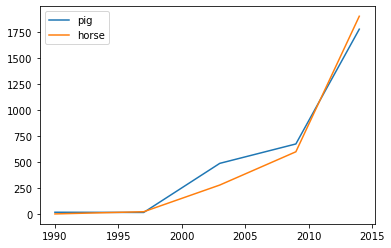

In [4]:
df = pd.DataFrame({
'pig': [20, 18, 489, 675, 1776],
'horse': [4, 25, 281, 600, 1900]
}, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

<AxesSubplot:>

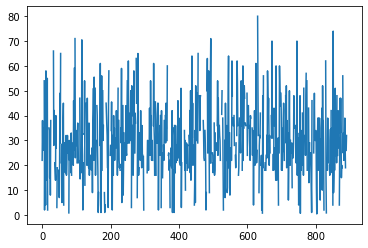

In [8]:
titanic_dataset.Age.plot.line()

### Afficher une donnée numérique / ou numérique et catégorique - histogram

**Quelle est la répartition des l'age des passagers ?**

<AxesSubplot:ylabel='Frequency'>

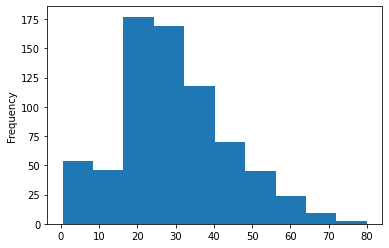

In [11]:
titanic_dataset.Age.plot.hist()

### Afficher plusieurs données numériques - scatter plot

**Quelle est la répartition du prix des tickets en fonction de l'age ?**

<AxesSubplot:xlabel='Age', ylabel='Fare'>

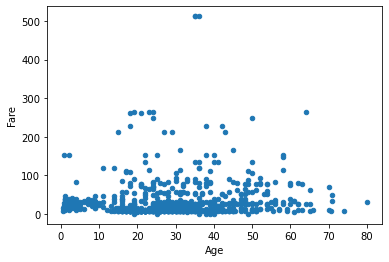

In [11]:
titanic_dataset.plot.scatter(x= 'Age', y='Fare')

### Afficher une donnée catégorique - bar plot

**Combien de passagers étaient présents dans chaque classe ?**

<AxesSubplot:>

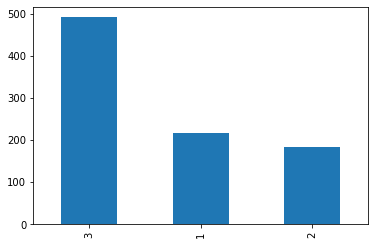

In [14]:
titanic_dataset["Pclass"].value_counts().plot.bar()

### Afficher des donnés catégoriques et numériques - box plot

**Quelle est la répartition de l'age des passagers pour chaque classe ?**

<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

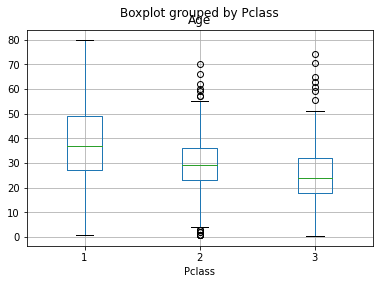

In [173]:
titanic_dataset.boxplot(column='Age', by='Pclass')

### Ajouter des légendes aux graphes

<AxesSubplot:title={'center':'Number of passengers of the titanic for each class'}, xlabel='class', ylabel='people'>

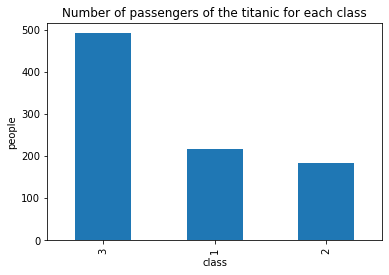

In [157]:
titanic_dataset["Pclass"].value_counts().plot.bar(xlabel= "class", ylabel="people", title="Number of passengers of the titanic for each class")

### Autres customisations

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html , https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<AxesSubplot:title={'center':'Number of passengers of the titanic for each class'}, xlabel='class', ylabel='people'>

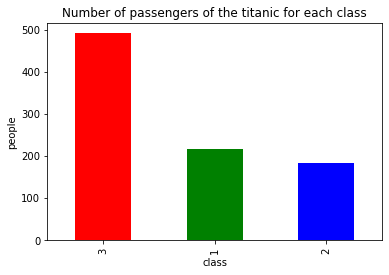

In [161]:
titanic_dataset["Pclass"].value_counts().plot.bar(xlabel= "class", ylabel="people", title="Number of passengers of the titanic for each class", color=["red", "green", "blue"])

**Exercices:** Essayez avec le dataset sur les AVC de la session précédente de réaliser:
- au moins un graphe d'une variable numérique 
- au moins un graphe d'une variable catégorique
- au moins un graphe d'une variable catégorique et numérique ensemble
- au moins un graphe de deux variables numériques ensemble

In [ ]:
#Votre code

## Partie 2 - Adapter le design pour aider la narrative 

### Graphe 1

<AxesSubplot:xlabel='Pclass,Survived', ylabel='number of people'>

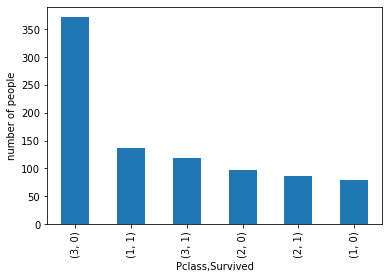

In [159]:
titanic_dataset[["Pclass", "Survived"]].value_counts().plot.bar(ylabel="number of people")

### Graphe 2

<AxesSubplot:xlabel='class'>

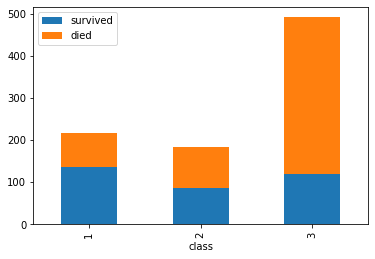

In [176]:
survived_class = titanic_dataset[titanic_dataset["Survived"] == 1]['Pclass'].value_counts()
not_survived_class = titanic_dataset[titanic_dataset["Survived"] == 0]['Pclass'].value_counts()
df = pd.DataFrame({"survived":survived_class, "died":not_survived_class})
df.plot.bar(stacked=True, xlabel="class")

### Graphe 3

<AxesSubplot:xlabel='class', ylabel='number of passengers'>

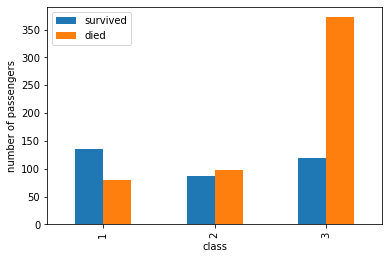

In [174]:
df.plot.bar(ylabel="number of passengers", xlabel="class")

### Graphe 4

<AxesSubplot:>

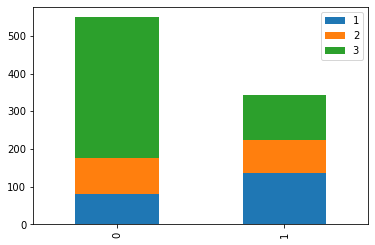

In [150]:
class1 = titanic_dataset[titanic_dataset["Pclass"] == 1]['Survived'].value_counts()
class2 = titanic_dataset[titanic_dataset["Pclass"] == 2]['Survived'].value_counts()
class3 = titanic_dataset[titanic_dataset["Pclass"] == 3]['Survived'].value_counts()
sub_df = pd.DataFrame({"1":class1, "2":class2, "3":class3})
sub_df.plot.bar(stacked=True)

### Graphe 5

array([<AxesSubplot:ylabel='survived'>, <AxesSubplot:ylabel='died'>],
      dtype=object)

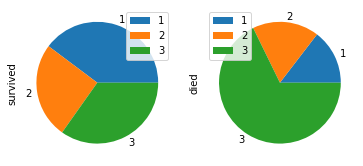

In [152]:
df.plot.pie(subplots=True)

**Exercice:** Regarder les graphes précédents et essayez de répondre aux questions suivantes:
- A votre avis, à quelle question est ce que ces graphes essayent de répondre ? 
- A votre avis, quel serait le meilleur graphe pour répondre à cette question ? Pourquoi ? 

-> le choix du graphe doit être informé principalement par "Qu'est ce que vous essayez de montrer ?", ensuite les éléments tels que le choix du graphe, les choix de couleurs, la taille et la position des éléments ainsi que les légendes doivent tous aider à la compréhension la plus simple du graphe. 

In [ ]:
# evidemment ce n'est pas une liste exhaustive, plein de facteurs peuvent jouer

## Partie 3 - Biais et éthique dans la data visualisation

Maintenant je vous invite à lire les 2 articles suivants ainsi que de reagarder la vidéo qui expliquent les bais que l'on peut trouver dans la visalusation de données:
- https://towardsdatascience.com/5-ways-data-visualizations-can-lie-46e54f41de37
- https://venngage.com/blog/misleading-graphs/
- https://www.youtube.com/watch?v=E91bGT9BjYk

**Question:**
- Est ce qu'il y a une information/un exemple qui vous a particulièrement marqué ?
- Est ce que vous vous rappellez avoir déjà été confronté à une mauvaise visualisation de donnés dans les médias/ dans une entreprise ?

Ressources pour aller plus loin: 
- https://www.eea.europa.eu/data-and-maps/daviz/learn-more/chart-dos-and-donts
- https://mschermann.github.io/data_viz_reader/introduction.html

### Partie 4 - A vous de jouer ! 

Maintenant que vous avez les bases de la data visualisation, à vous de jouer ! Essayer de transformer en graphique les 3 insights que vous avez trouvés sur le data set AVC à la session précédente. Au bout d'un certain temps vous présentrez vos graphiques à un camarade. Le but du jeu sera que votre camarade arrive à deviner l'insight que vous souhaitez transmettre uniquement par votre graphique. Essayez d'éviter les biais dans vos représen

In [177]:
#Votre code